# Automatic object recognition (clustering):

1. Feature extraction: Object segmentation - extraction of regional object properties
2. Object clustering using k-means

## Segmentation and regional properties

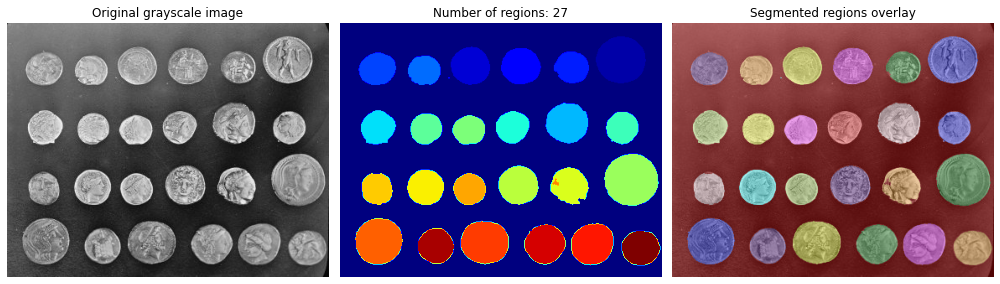

In [43]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk 
from skimage import io
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

IG = data.coins()

# Segmentation using Watershed:
markers = np.zeros_like(IG)
markers[IG < 30] = 1
markers[IG > 150] = 2

from skimage.segmentation import watershed
from skimage.filters import sobel
elevation_map = sobel(IG)
bw = watershed(elevation_map, markers)


# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image') 
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay') 

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [44]:
from skimage.measure import regionprops_table
import pandas as pd  

props_table = regionprops_table(label_image,properties=['label','area', 'eccentricity'])
df = pd.DataFrame(props_table) 

df.head()

,label,area,eccentricity
0,1,77407,0.611800
1,2,2604,0.332340
2,3,1653,0.294055
3,4,1622,0.383282
4,5,1225,0.388527


Drop region correspoding to background

In [45]:
df = df.drop(0,axis=0)
df.head()

,label,area,eccentricity
1,2,2604,0.332340
2,3,1653,0.294055
3,4,1622,0.383282
4,5,1225,0.388527
5,6,1355,0.510381


In [46]:
feat = df[['area','eccentricity']]
feat.head()

,area,eccentricity
1,2604,0.332340
2,1653,0.294055
3,1622,0.383282
4,1225,0.388527
5,1355,0.510381


## Clustering regional properties

In [47]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=2).fit_predict(feat)
print(group)

[1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0]


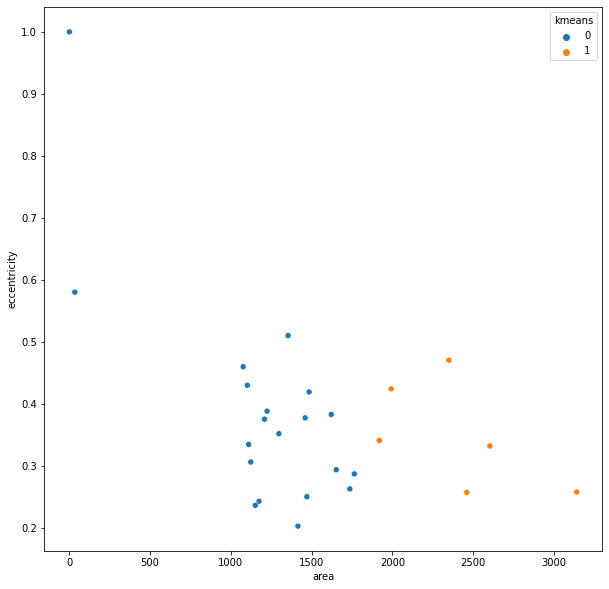

In [48]:
import seaborn as sns 
df['kmeans']=group
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x='area',y='eccentricity',hue='kmeans',data=df)
plt.show()